In [4]:
#Import required packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nilearn import plotting
from nistats.reporting import plot_design_matrix, plot_contrast_matrix
from nistats.second_level_model import SecondLevelModel
from nistats.thresholding import map_threshold

In [2]:
#Defining Data Directory
data_dir = '/Volumes/2019/BIDS'

In [9]:
#List of subjects
list_subjects = ['sub-501',
'sub-502',
'sub-503',
'sub-504',
#'sub-505',
'sub-506',
'sub-507',
'sub-508',
'sub-509',
'sub-511',
'sub-512',
'sub-513',
'sub-514',
'sub-515',
'sub-516',
'sub-518',
'sub-519',
'sub-520',
'sub-521',
'sub-523',
'sub-524',
'sub-525',
'sub-526',
'sub-527',
'sub-528',
'sub-529',
'sub-530',
#'sub-531',
'sub-532',
'sub-533',
'sub-534',
'sub-535',
'sub-536',
'sub-537',
#'sub-539',
'sub-540',
'sub-541',
'sub-542',
'sub-543',
'sub-544',
'sub-545',
'sub-546',
'sub-547',
'sub-548',
'sub-549',
'sub-551',
'sub-552',
'sub-553',
'sub-557',
'sub-558',
'sub-559',
'sub-560',
'sub-562',
'sub-563',
'sub-564',
'sub-565',
'sub-567',
'sub-568',
'sub-569',
'sub-570',
'sub-571',
'sub-573',
'sub-574',
'sub-575',
#'sub-701',
'sub-702',
'sub-703',
'sub-705',
'sub-707',
'sub-708',
'sub-709',
'sub-711',
'sub-712',
'sub-713',
'sub-715',
'sub-716',
'sub-717',
'sub-718',
'sub-719',
'sub-720',
'sub-721',
'sub-722',
'sub-723',
'sub-724',
'sub-725',
#'sub-726',
'sub-727',
'sub-728',
'sub-729',
'sub-730',
'sub-732',
'sub-733',
#'sub-734',
'sub-735',
'sub-736',
'sub-737',
'sub-738',
'sub-739']

In [24]:
N_total = len(list_subjects)
N_total

92

In [5]:
#Phenotype file
phenotype_file = data_dir + '/phenotype.tsv'
phenotype = pd.read_table(phenotype_file)

In [10]:
phenotype.columns = ['subject_label', 'group', 'sex', 'age', 'suicide',
       'depression', 'BDI_Total', 'SBQ_Total', 'CTQ_PhysAbuse',
       'CTQ_PhysNeglect', 'CTQ_EmoAbuse', 'CTQ_EmoNeglect', 'CTQ_SexAbuse',
       'CTQ_Total', 'IQ_Total', 'BIS_Total', 'BIS_NonPlanning', 'BIS_Motor',
       'BIS_Attentional', 'FACES_BALANCEDCOHESION',
       'FACES_BALANCEDFLEXIBILITY', 'FACES_DISENGAGED', 'FACES_ENMESHED',
       'FACES_RIGID', 'FACES_CHAOTIC', 'FACES_FAMILYCOMMUNICATIONSCORE',
       'FACES_FAMILYSATISFACTIONSCORE', 'FACES_COHESIONRATIO',
       'FACES_FLEXIBILITYRATIO', 'FACES_TOTALCIRCUMPLEXRATIO']

In [11]:
phenotype.set_index('subject_label', drop=False, append=False, inplace=True, verify_integrity=False)

In [12]:
phenotype_subj = phenotype.loc[list_subjects,:]

In [20]:
#Rounding age to years

phenotype_subj = phenotype_subj.round({"age":0}) 

In [21]:
phenotype_subj.head()

,subject_label,group,sex,age,suicide,depression,BDI_Total,SBQ_Total,CTQ_PhysAbuse,CTQ_PhysNeglect,...,FACES_BALANCEDFLEXIBILITY,FACES_DISENGAGED,FACES_ENMESHED,FACES_RIGID,FACES_CHAOTIC,FACES_FAMILYCOMMUNICATIONSCORE,FACES_FAMILYSATISFACTIONSCORE,FACES_COHESIONRATIO,FACES_FLEXIBILITYRATIO,FACES_TOTALCIRCUMPLEXRATIO
subject_label,,,,,,,,,,,,,,,,,,,,,
sub-501,sub-501,1,0,17.0,1,1,2,10,0.0,0.0,...,16,25,14,14,21,26,26,0.820513,0.914286,1.729730
sub-502,sub-502,1,1,17.0,0,1,20,5,0.0,0.0,...,24,19,13,21,15,35,31,1.529412,1.297297,2.642857
sub-503,sub-503,1,1,14.0,0,1,5,5,0.0,0.0,...,31,7,12,30,7,50,50,3.684211,1.675676,4.714286
sub-504,sub-504,1,1,14.0,0,1,25,13,0.0,1.0,...,24,19,13,21,15,35,31,1.529412,1.297297,2.642857
sub-506,sub-506,1,1,17.0,0,1,29,11,0.0,4.0,...,24,19,13,21,15,35,31,1.529412,1.297297,2.642857


In [10]:
from nistats.design_matrix import make_second_level_design_matrix
design_matrix = make_second_level_design_matrix(list_subjects, phenotype_subj)

In [11]:
design_matrix.head()

,group,sex,age,suicide,depression,BDI_Total,SBQ_Total,CTQ_PhysAbuse,CTQ_PhysNeglect,CTQ_EmoAbuse,...,FACES_DISENGAGED,FACES_ENMESHED,FACES_RIGID,FACES_CHAOTIC,FACES_FAMILYCOMMUNICATIONSCORE,FACES_FAMILYSATISFACTIONSCORE,FACES_COHESIONRATIO,FACES_FLEXIBILITYRATIO,FACES_TOTALCIRCUMPLEXRATIO,intercept
0,1.0,0.0,17.246575,1.0,1.0,2.0,10.0,0.0,0.0,0.0,...,25.0,14.0,14.0,21.0,26.0,26.0,0.820513,0.914286,1.729730,1.0
1,1.0,1.0,17.202740,0.0,1.0,20.0,5.0,0.0,0.0,0.0,...,19.0,13.0,21.0,15.0,35.0,31.0,1.529412,1.297297,2.642857,1.0
2,1.0,1.0,13.545205,0.0,1.0,5.0,5.0,0.0,0.0,0.0,...,7.0,12.0,30.0,7.0,50.0,50.0,3.684211,1.675676,4.714286,1.0
3,1.0,1.0,14.287671,0.0,1.0,25.0,13.0,0.0,1.0,3.0,...,19.0,13.0,21.0,15.0,35.0,31.0,1.529412,1.297297,2.642857,1.0
4,1.0,1.0,17.304110,0.0,1.0,29.0,11.0,0.0,4.0,8.0,...,19.0,13.0,21.0,15.0,35.0,31.0,1.529412,1.297297,2.642857,1.0


In [29]:
# Get the set of individual statistical maps (contrast estimates)

results_dir = '/Volumes/2019/BIDS/derivatives/results/func/CB/'

def retrieve_contrast(subject_list, contrast_name, model_name):
    cmap_list = []
    for sub in subject_list:
        cmap_list.append(results_dir + sub + '_contrast-' + contrast_name + '_model-' + model_name +'_zmap.nii.gz')
    return cmap_list

In [15]:
contrasts = ['Inclusion-Control','Exclusion-Control','Exclusion-Inclusion']

In [30]:
cmap_Inclusion = retrieve_contrast(list_subjects, 'Inclusion-Control', 'simple')
cmap_Exclusion = retrieve_contrast(list_subjects, 'Exclusion-Control', 'simple')
cmap_ExclusionMinusInclusion = retrieve_contrast(list_subjects, 'Exclusion-Inclusion', 'simple')

Perform the second level analysis - Inclusion
-----------------------------------------------------

First define a design matrix for the model. As the model is trivial (one-sample test), the design matrix is just one column with ones.

In [25]:
design_matrix = pd.DataFrame([1] * N_total, columns=['intercept'])

Visualize the results 
---------------------

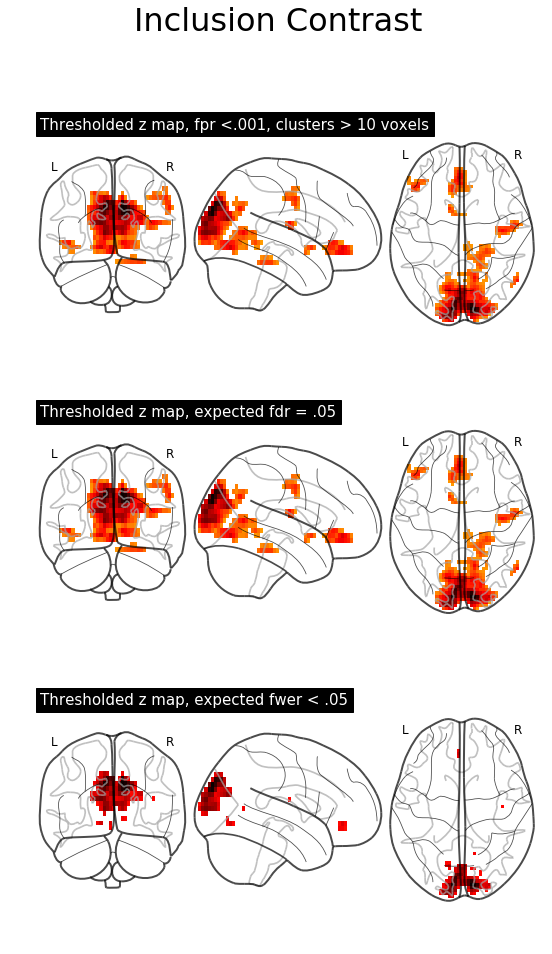

In [73]:
second_level_model = SecondLevelModel().fit(
    cmap_Inclusion, design_matrix=design_matrix)

z_map = second_level_model.compute_contrast(output_type='z_score')

thresholded_map1, threshold1 = map_threshold(
    z_map, level=.001, height_control='fpr', cluster_threshold=10)

thresholded_map2, threshold2 = map_threshold(
    z_map, level=.05, height_control='fdr')

thresholded_map3, threshold3 = map_threshold(
    z_map, level=.05, height_control='bonferroni')

fig = plt.figure(figsize=(9, 15))

plotting.plot_glass_brain(thresholded_map1, display_mode='ortho', 
    title='Thresholded z map, fpr <.001, clusters > 10 voxels', 
    threshold=threshold1,
    axes= plt.subplot(3, 1, 1))

plotting.plot_glass_brain(thresholded_map1, display_mode='ortho',
    title='Thresholded z map, expected fdr = .05',
    threshold=threshold2,
    axes = plt.subplot(3, 1, 2))

plotting.plot_glass_brain(thresholded_map3, display_mode='ortho',
    title='Thresholded z map, expected fwer < .05',
    threshold=threshold3,
    axes = plt.subplot(3, 1, 3))

fig.suptitle('Inclusion Contrast',fontsize=32)
plt.show()

Perform the second level analysis - Exclusion
----------------------------------------------------


/Users/gifuni/anaconda3/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


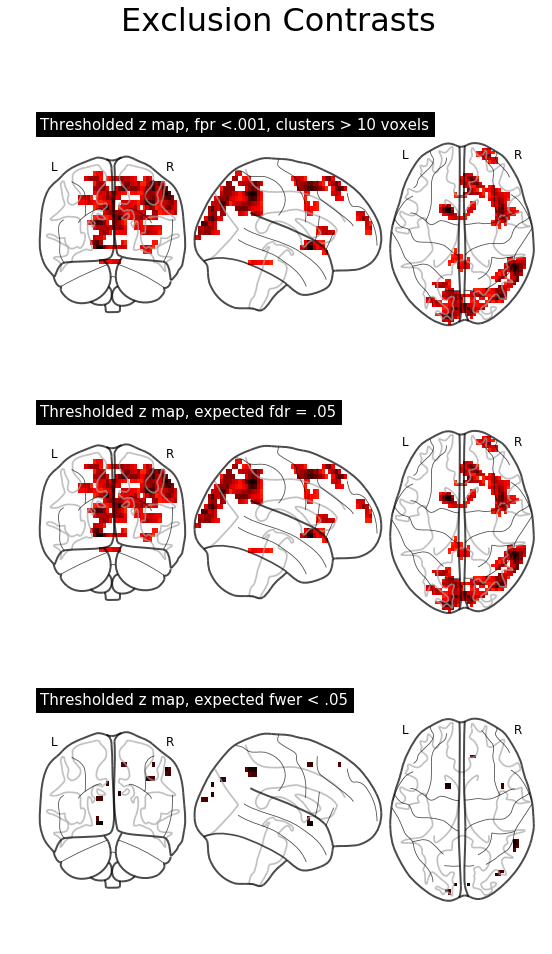

In [75]:
second_level_model = SecondLevelModel().fit(
    cmap_Exclusion, design_matrix=design_matrix)

z_map = second_level_model.compute_contrast(output_type='z_score')

thresholded_map1, threshold1 = map_threshold(
    z_map, level=.001, height_control='fpr', cluster_threshold=10)

thresholded_map2, threshold2 = map_threshold(
    z_map, level=.05, height_control='fdr')

thresholded_map3, threshold3 = map_threshold(
    z_map, level=.05, height_control='bonferroni')

fig = plt.figure(figsize=(9, 15))

plotting.plot_glass_brain(thresholded_map1, display_mode='ortho', 
    title='Thresholded z map, fpr <.001, clusters > 10 voxels', 
    threshold=threshold1,
    axes= plt.subplot(3, 1, 1))

plotting.plot_glass_brain(thresholded_map1, display_mode='ortho',
    title='Thresholded z map, expected fdr = .05',
    threshold=threshold2,
    axes = plt.subplot(3, 1, 2))

plotting.plot_glass_brain(thresholded_map3, display_mode='ortho',
    title='Thresholded z map, expected fwer < .05',
    threshold=threshold3,
    axes = plt.subplot(3, 1, 3))

fig.suptitle('Exclusion Contrasts',fontsize=32)
plt.show()

Perform the second level analysis - Exclusion-Inclusion
----------------------------------------------------


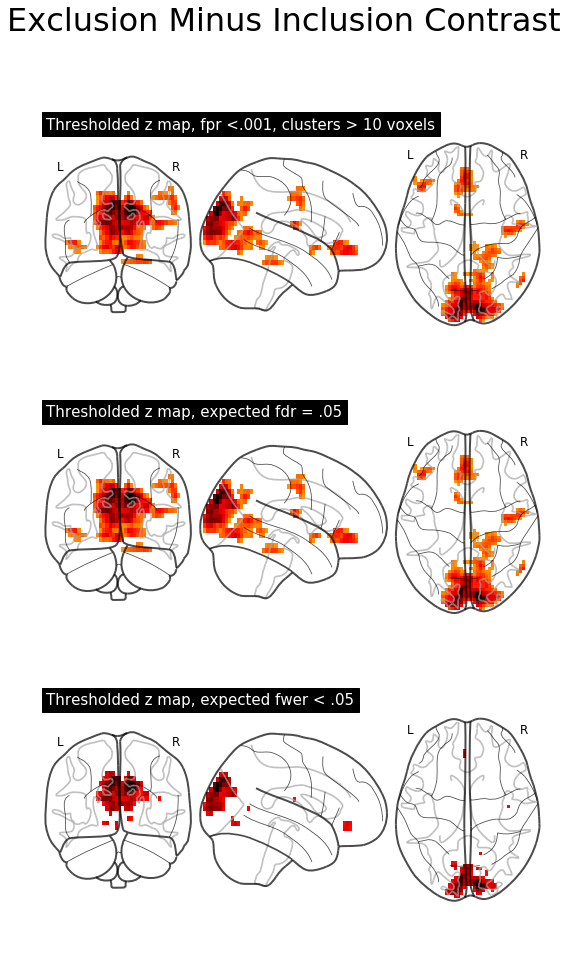

In [76]:
second_level_model = SecondLevelModel().fit(
    cmap_ExclusionMinusInclusion, design_matrix=design_matrix)

z_map = second_level_model.compute_contrast(output_type='z_score')

thresholded_map1, threshold1 = map_threshold(
    z_map, level=.001, height_control='fpr', cluster_threshold=10)

thresholded_map2, threshold2 = map_threshold(
    z_map, level=.05, height_control='fdr')

thresholded_map3, threshold3 = map_threshold(
    z_map, level=.05, height_control='bonferroni')

fig = plt.figure(figsize=(9, 15))

plotting.plot_glass_brain(thresholded_map1, display_mode='ortho', 
    title='Thresholded z map, fpr <.001, clusters > 10 voxels', 
    threshold=threshold1,
    axes= plt.subplot(3, 1, 1))

plotting.plot_glass_brain(thresholded_map1, display_mode='ortho',
    title='Thresholded z map, expected fdr = .05',
    threshold=threshold2,
    axes = plt.subplot(3, 1, 2))

plotting.plot_glass_brain(thresholded_map3, display_mode='ortho',
    title='Thresholded z map, expected fwer < .05',
    threshold=threshold3,
    axes = plt.subplot(3, 1, 3))

fig.suptitle('Exclusion Minus Inclusion Contrast',fontsize=32)
plt.show()